# Weighted interval scheduling
Following Kleinberg and Tardos


## Problem Description:
 Given a set of activities (or tasks) with start time, finish time and weight, select a compatible (non overlapping) subset of requests so as to maximize the total weight.

## Algorithm Description
Unlike the unweighted case, the greedy algorithm does not work in general. A dynamic solution works well

### 

In [64]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from itertools import combinations
import matplotlib.patches as patches

## Choose colors

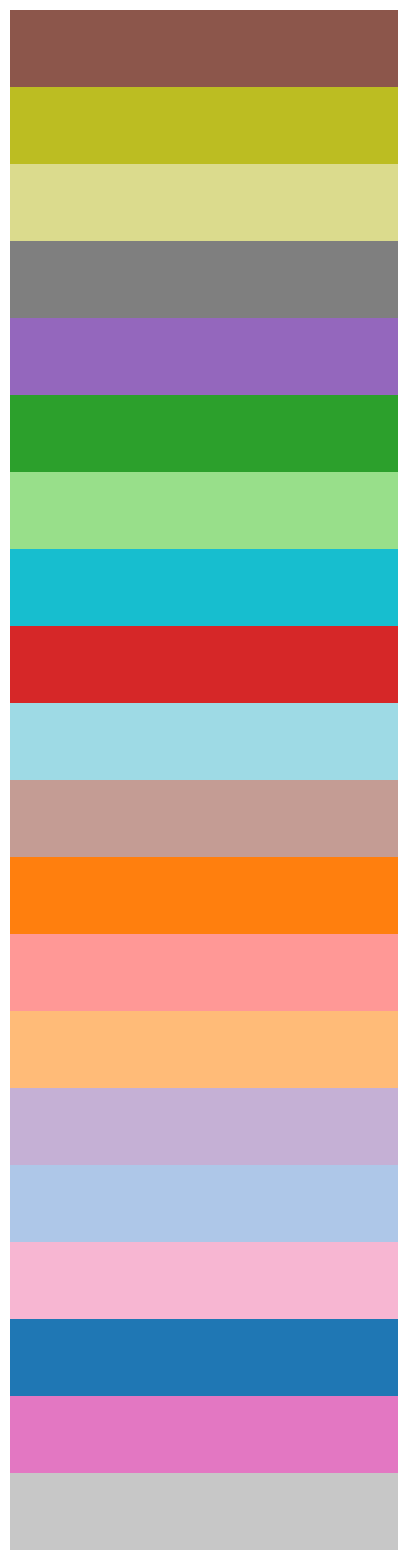

In [65]:
cmap = plt.cm.tab20
colors = [cmap(i) for i in range(20)]
random.shuffle(colors)
          
def display_colors(color_list):
    # Create figure and axes
    fig, ax = plt.subplots(figsize=(5, len(color_list)))

    # Display each color as a rectangle
    for idx, color in enumerate(color_list):
        rect = patches.Rectangle((0, idx), 5, 1, linewidth=1, edgecolor='none', facecolor=color)
        ax.add_patch(rect)

    # Adjust the view
    ax.set_xlim(0, 3)
    ax.set_ylim(0, len(color_list))
    ax.axis('off')  # Hide the axis
    plt.show()
display_colors(colors)

## Generate instances

In [66]:
def generate_intervals(number_of_intervals=20,min_start=0,max_start=50,max_length=20):
    ans=[]
    for i in range(number_of_intervals):
        line=dict()
        line["start"]=np.random.choice(range(min_start,max_start))
        line["end"]=line["start"]+np.random.choice(range(1,max_length))
        line["weight"]=np.random.choice(range(100))
        ans.append(line)
    ans=sorted(ans,key=lambda x: x['end'])
    for line in ans:
        line["index"]=ans.index(line)
    return ans

## Plot Instance

In [67]:
def plot_instance(instance,color="black"):
    if color=="black":
        color=["black"]*len(instance)

    # Create a new figure and axis object
    fig, ax = plt.subplots()
    lines_data = instance
    # Plot each horizontal line
    for line in lines_data:
        l,=ax.plot([line["start"], line["end"]], [line["index"], line["index"]])
        l.set_linewidth(3)
        l.set_color(color[lines_data.index(line)])
    return plt.show()


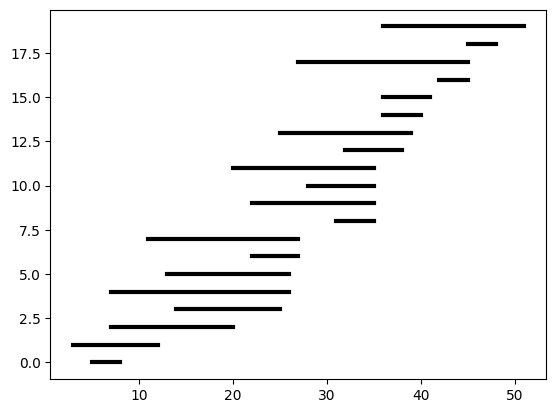

In [68]:
plot_instance(generate_intervals())

## Check collision

In [69]:
def check_collision(x,y):
    ans=True
    if x["start"]>=y["end"] or y["start"]>=x["end"]:
        ans= False
    return ans

## Find previous
In this algorithm the intervals are ordered by finishing time. The previous compatible is the largests
j < i such that interval j is compatible with interval i 

In [70]:
def find_previous(requests):
    previous=dict()
    for i in range(len(requests)):
        candidates=[-1]
        for j in range(i):
            if not check_collision(requests[i],requests[j]):
                candidates.append(j)
        previous[i]=max(candidates)
    return previous

In [71]:
requests=generate_intervals()

In [72]:
requests

[{'start': 2, 'end': 8, 'weight': 97, 'index': 0},
 {'start': 2, 'end': 13, 'weight': 78, 'index': 1},
 {'start': 11, 'end': 15, 'weight': 39, 'index': 2},
 {'start': 8, 'end': 16, 'weight': 80, 'index': 3},
 {'start': 10, 'end': 22, 'weight': 43, 'index': 4},
 {'start': 11, 'end': 24, 'weight': 69, 'index': 5},
 {'start': 7, 'end': 25, 'weight': 22, 'index': 6},
 {'start': 11, 'end': 27, 'weight': 46, 'index': 7},
 {'start': 9, 'end': 27, 'weight': 84, 'index': 8},
 {'start': 14, 'end': 28, 'weight': 86, 'index': 9},
 {'start': 14, 'end': 31, 'weight': 3, 'index': 10},
 {'start': 23, 'end': 34, 'weight': 60, 'index': 11},
 {'start': 41, 'end': 42, 'weight': 37, 'index': 12},
 {'start': 34, 'end': 43, 'weight': 85, 'index': 13},
 {'start': 42, 'end': 43, 'weight': 94, 'index': 14},
 {'start': 28, 'end': 46, 'weight': 43, 'index': 15},
 {'start': 42, 'end': 48, 'weight': 87, 'index': 16},
 {'start': 45, 'end': 49, 'weight': 67, 'index': 17},
 {'start': 40, 'end': 53, 'weight': 65, 'inde

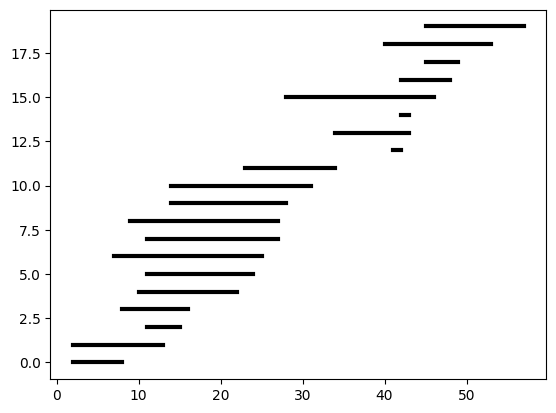

In [73]:
plot_instance(requests)

In [74]:
find_previous(requests)

{0: -1,
 1: -1,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: -1,
 7: 0,
 8: 0,
 9: 1,
 10: 1,
 11: 4,
 12: 11,
 13: 11,
 14: 12,
 15: 9,
 16: 12,
 17: 14,
 18: 11,
 19: 14}

## Weight function

In [75]:
## A function that computes the total weight of the intervales in places "indices" for the list of intervals "requests"
def weight(intervals:list):
    ## indices is a list of inidces and intervals is a list of intervals
    return sum([interval["weight"] for interval  in intervals])

### Dynamic algorithm for weighter interval scheduling

In [77]:
def dynamic_algo_interval(intervals:list):# Takes a list of intervals, where each interval is a dictionary
    previous=find_previous(intervals)
    answer=dict()
    answer[-1]=[]
    answer[0]=[0]
    for i in range(1,len(intervals)):
        ans=answer[previous[i]]+[i]
        if weight([intervals[i] for i in answer[i-1]])>weight([intervals[i] for i in ans]):
            ans=answer[i-1]
        answer[i]=ans
    return answer
    

In [78]:
dynamic_algo_interval(requests)

{-1: [],
 0: [0],
 1: [0],
 2: [0, 2],
 3: [0, 3],
 4: [0, 3],
 5: [0, 3],
 6: [0, 3],
 7: [0, 3],
 8: [0, 8],
 9: [0, 9],
 10: [0, 9],
 11: [0, 3, 11],
 12: [0, 3, 11, 12],
 13: [0, 3, 11, 13],
 14: [0, 3, 11, 12, 14],
 15: [0, 3, 11, 12, 14],
 16: [0, 3, 11, 12, 14],
 17: [0, 3, 11, 12, 14, 17],
 18: [0, 3, 11, 12, 14, 17],
 19: [0, 3, 11, 12, 14, 17]}

## Paint answer

In [79]:
def paint_answer(requests):
    N=len(requests)
    remaining=dynamic_algo_interval(requests)[N-1]
    color=["black"]*N
    for i in remaining:
        color[i]="deeppink"

    return plot_instance(requests,color=color)

In [80]:
requests=generate_intervals(number_of_intervals=30)

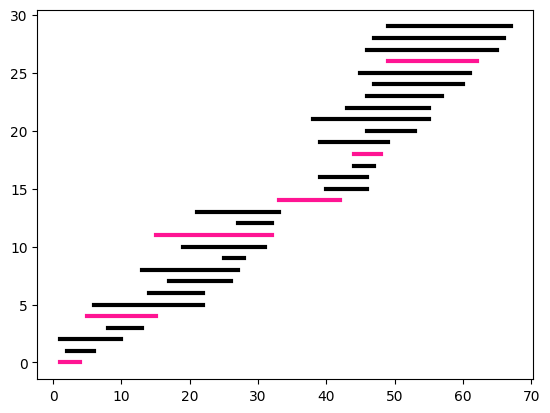

In [81]:
paint_answer(requests)